***
# Value-Iteration-Policy-Iteration-Comparison in 6x6 Custom Mapsize
***

### Policy iteration and Value iteration are both dynamic programming algorithms used for solving Markov decision processes (MDPs), which are mathematical models used in decision-making problems. Here are some short differences between policy iteration and value iteration:

### Objective:
Value Iteration: The main focus is on iteratively improving the value function until it converges to the optimal value function.
Policy Iteration: It alternates between policy evaluation and policy improvement steps to find the optimal policy directly.

### Iterations:
Value Iteration: Requires multiple iterations to converge to the optimal value function.
Policy Iteration: Typically converges in fewer iterations than value iteration.

### Updates:
Value Iteration: Updates the value function at each state in each iteration.
Policy Iteration: Updates the policy and performs a complete policy evaluation in each iteration.

### Convergence:
Value Iteration: Converges when the value function stops changing significantly between iterations.
Policy Iteration: Converges when the policy and value function reach their optimal values.

### Computational Efficiency:
Value Iteration: Can be computationally more efficient in terms of the number of iterations.
Policy Iteration: Can be computationally more efficient in terms of the time complexity per iteration.

### Exploration-Exploitation:
Value Iteration: Tends to emphasize exploration early on and exploitation later in the process.
Policy Iteration: Balances exploration and exploitation more evenly throughout the process.

### Memory Requirements:
Value Iteration: Typically requires less memory as it updates the value function directly.
Policy Iteration: May require more memory as it maintains both the policy and the corresponding value function.

In [1]:
# require libraries
import gym
import time 
import pygame
import numpy as np
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v1', desc=['SFFFFF', 
                                      'FHFHHH', 
                                      'FHFFFF', 
                                      'FHFHHF', 
                                      'FHFFHF', 
                                      'FFFFFG'], is_slippery=False) # initialize our custom map

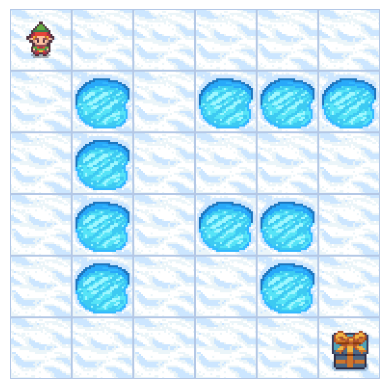

In [3]:
env.reset()
plt.axis('off')
plt.imshow(env.render(mode='rgb_array'));

## Sample Action

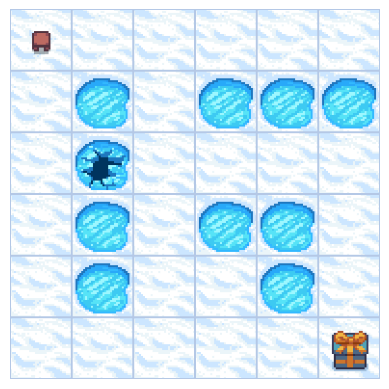

In [4]:
state = env.reset()
done = False

while not done:
    time.sleep(0.1)
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    
    plt.axis('off')
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())    
    display.clear_output(wait=True)
    
env.close()

## Policy Iteration

In [5]:
num_states = env.observation_space.n
num_actions = env.action_space.n 
gamma = 0.99
theta = 1e-9

random_policy = np.ones((num_states, num_actions))/4 # make a random policy

def policy_evaluation(policy):
    iteration = 0
    old_V = np.zeros(num_states)
    
    
    while True:
        delta = 0
        V = np.zeros(num_states)
        
        for state in range(num_states):
            for action in range(num_actions):
                for  prob, next_state, reward, _ in env.P[state][action]:
                    V[state] += prob * policy[state][action] * (reward + gamma * old_V[next_state])
                                       
        delta = np.max(np.abs(V - old_V))
                                       
        if delta < theta:
            break
                                                         
        old_V = np.copy(V)
                                       
    return V 


def policy_imporovement(V):
    policy = np.zeros((num_states, num_actions))
    Q = np.zeros((num_states, num_actions))

    for state in range(num_states):
        for action in range(num_actions):
            for prob, next_state, reward, _ in env.P[state][action]:
                Q[state][action] += prob * (reward + gamma * V[next_state]) 
    
    max_index = np.argmax(Q, axis=1)
    
    for i, optimal_action in enumerate(max_index):
        policy[i][optimal_action] = 1
    
    return policy


def policy_iteration(policy):
    old_policy = policy
    iteration_p = 0
    
    while True:
        iteration_p += 1
    
        V = policy_evaluation(policy)
        policy = policy_imporovement(V)

        comparison = (old_policy == policy)
        if comparison.all() == True:
            break
        old_policy = policy
    
    return policy, iteration_p

start_1 = time.time()
optimal_policy_1, iteration_p = policy_iteration(random_policy)
end_1 = time.time()

time_p = (end_1 - start_1) # computing time

## Value Iteration

In [6]:
def value_iteration():
    prev_V = np.zeros((num_states, 1))
    policy = np.zeros((num_states, num_actions))
    iteration_v = 0

    
    while True:
        iteration_v += 1
        Q = np.zeros((num_states, num_actions))
        
        for state in range(num_states):
            for action in range(num_actions):
                for prob, next_state, reward, _ in env.P[state][action]:
                    Q[state][action] += prob * (reward + gamma * prev_V[next_state])
    
        V = np.max(Q, axis = 1)
        
        if np.max(np.abs(prev_V - V)) < theta:
            break
        
        prev_V = V
        
    max_index = np.argmax(Q, axis = 1)
        
    for i, optimal_action in enumerate(max_index):
        policy[i][optimal_action] = 1
    
    return policy, iteration_v

start_2 = time.time()
optimal_policy_2, iteration_v = value_iteration()
end_2 = time.time()

time_v = (end_2 - start_2)

In [7]:
print(f'Policy Iteration Has Been Done in {iteration_p} Iterations and Converging Time is: {time_p:.2f}\nValue Iteration Has Been Done in {iteration_v} Iterations and Converging Time is: {time_v:.2f}')

Policy Iteration Has Been Done in 2 Iterations and Converging Time is: 0.06
Value Iteration Has Been Done in 12 Iterations and Converging Time is: 0.01


## Use Optimal Policy in Environment

In [8]:
final_policy = np.zeros((num_states))

for state in range(num_states):
    for action in range(num_actions):
        final_policy = np.argmax(optimal_policy_1, axis=1)

You achived 1.0 reward in 10 moves


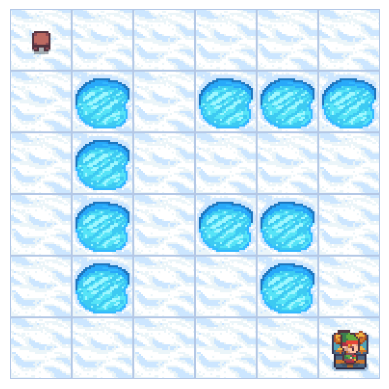

In [9]:
state = env.reset()
done = False
t = 0
while not done:
    time.sleep(0.1)
    action = final_policy[state]
    next_state, reward, done, _ = env.step(action)
    t += 1
    state = next_state

    plt.axis('off')
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())    
    display.clear_output(wait=True)

env.close()
print(f'You achived {reward} reward in {t} moves')